In [1]:
# Colab: run this cell
!pip install control matplotlib numpy --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.3/578.3 kB 13.5 MB/s eta 0:00:00


Case A -> wn=4.472 rad/s, zeta=0.112
Step info (Case A): {'RiseTime': 0.2808030601212251, 'SettlingTime': 7.862485683394302, 'SettlingMin': 0.025365614881896623, 'SettlingMax': 0.08492585830887818, 'Overshoot': 69.85171661775635, 'Undershoot': 0.0, 'Peak': 0.08492585830887818, 'PeakTime': 0.7300879563151852, 'SteadyStateValue': 0.05}


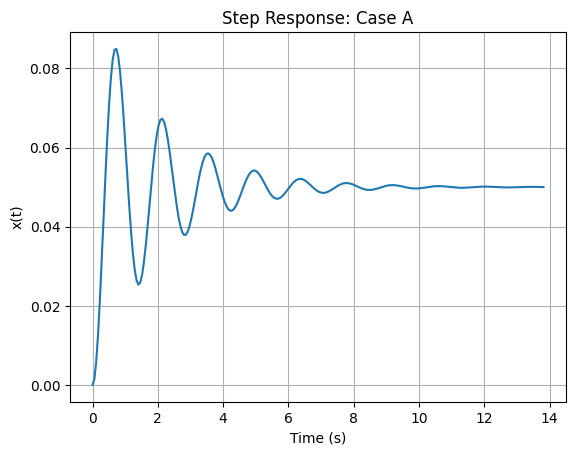

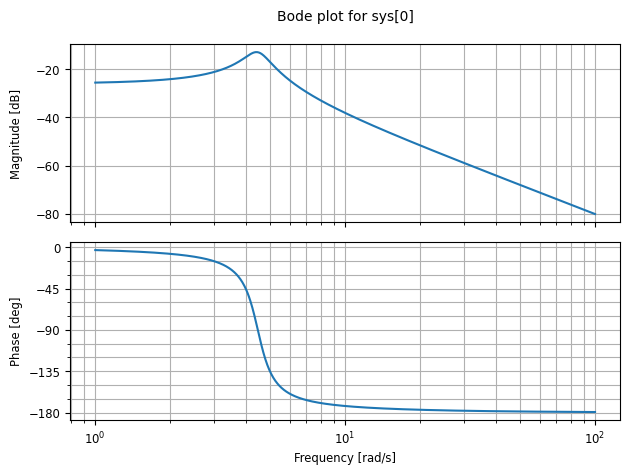

Margins -> GM=inf, PM=inf deg, Wcg=nan rad/s, Wcp=nan rad/s
Case B -> zeta=0.671


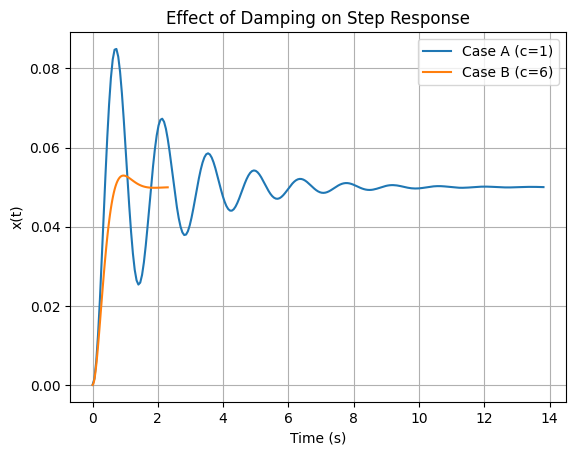

Step info (Closed-loop PD): {'RiseTime': 0.13955061169660887, 'SettlingTime': 2.058371522524981, 'SettlingMin': 0.40517473398294596, 'SettlingMax': 0.7701841942301066, 'Overshoot': 54.036838846021325, 'Undershoot': 0.0, 'Peak': 0.7701841942301066, 'PeakTime': 0.38376418216567443, 'SteadyStateValue': 0.5}


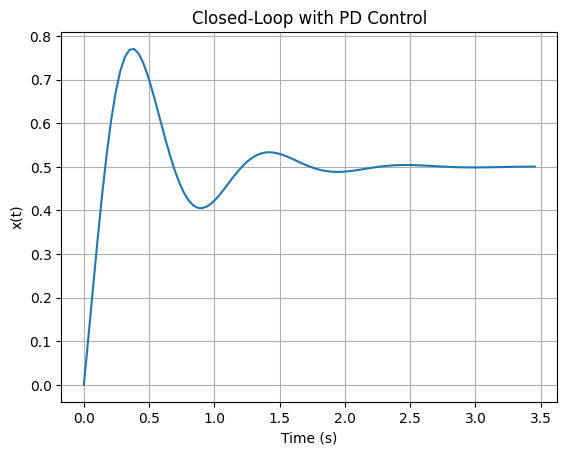

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# --- Plant parameters ---
m, c, k = 1.0, 1.0, 20.0
G = ctl.tf([1.0], [m, c, k])

# Natural frequency and damping ratio
wn = np.sqrt(k/m)
zeta = c/(2*np.sqrt(m*k))
print(f"Case A -> wn={wn:.3f} rad/s, zeta={zeta:.3f}")

# Step response + metrics
t, y = ctl.step_response(G)
S = ctl.step_info(G)
print("Step info (Case A):", S)

plt.figure()
plt.plot(t, y)
plt.title("Step Response: Case A")
plt.xlabel("Time (s)")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

# ---- Bode + margins (FIXED) ----
# Option 1: draw the plot
ctl.bode_plot(G, dB=True, Hz=False)  # <— no 'Plot' kwarg
plt.show()

# Option 2: just get arrays (uncomment if you want the raw values too)
# mag, phase, omega = ctl.bode(G, dB=True, Hz=False)

gm, pm, wg, wp = ctl.margin(G)
print(f"Margins -> GM={gm:.2f}, PM={pm:.2f} deg, Wcg={wg:.3f} rad/s, Wcp={wp:.3f} rad/s")

# --- Higher damping comparison ---
c2 = 6.0
G2 = ctl.tf([1.0], [m, c2, k])
zeta2 = c2/(2*np.sqrt(m*k))
print(f"Case B -> zeta={zeta2:.3f}")

t1, y1 = ctl.step_response(G)
t2, y2 = ctl.step_response(G2)

plt.figure()
plt.plot(t1, y1, label="Case A (c=1)")
plt.plot(t2, y2, label="Case B (c=6)")
plt.title("Effect of Damping on Step Response")
plt.xlabel("Time (s)")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()

# --- Simple PD control ---
Kp, Kd = 20.0, 3.0
Cpd = ctl.tf([Kd, Kp], [1])
Tcl = ctl.feedback(Cpd*G, 1)

t_cl, y_cl = ctl.step_response(Tcl)
S_cl = ctl.step_info(Tcl)
print("Step info (Closed-loop PD):", S_cl)

plt.figure()
plt.plot(t_cl, y_cl)
plt.title("Closed-Loop with PD Control")
plt.xlabel("Time (s)")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()
